# 1. Representation Of Data

 Unfortunately, it's very difficult to explore a dataset to uncover patterns when it's represented as a table, especially when that dataset contains many values. We need a different representation of data that can help us identify patterns more easily.

we'll learn the basics of `data visualization, a discipline that focuses on the visual representation of data. As humans, our brains have evolved to develop powerful visual processing capabilities. We can quickly find patterns in the visual information we encounter`, which was incredibly important from a survivability standpoint. Unfortunately, when data is represented as tables of values, we can't really take advantage of our visual pattern matching capabilities. This is because our ability to quickly process symbolic values (like numbers and words) is very poor. **Data visualization focuses on transforming data from table representations visual ones**.

* In this mission, we'll use a specific type of data visualization to understand U.S. unemployment data.

# 2. Introduction To The Data

* The [United States Bureau of Labor Statistics (BLS)](https://www.bls.gov/) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. While unemployment rate [isn't perfect](https://en.wikipedia.org/wiki/Unemployment#Limitations_of_the_unemployment_definition), it's a commonly used proxy for the health of the economy. You may have heard politicians and reporters state the unemployment rate when commenting on the economy. You can read more about how the BLS calculates the unemployment rate [here](https://www.bls.gov/cps/cps_htgm.htm).

*  We've downloaded the monthly unemployment rate as CSV file from the website of the [Federal Reserve Bank of St. Louis](https://www.stlouisfed.org/) from January 1948 to August 2016, saved it as unrate.csv, and made it available in this mission.

## TODO:
* Read unrate.csv into a DataFrame and assign to unrate.
* Use the pandas.to_datetime function to convert the DATE column into a series of datetime values.
* Display the first 12 rows in unrate.

In [1]:
import pandas as pd 
unrate=pd.read_csv('unrate.csv')

In [2]:
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [3]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
DATE     824 non-null object
VALUE    824 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


* When we read the dataset into a DataFrame, pandas will set the data type of the DATE column as a text column.
* Because of how pandas reads in strings internally, this column is given a data type of object. We need to convert this column to the datetime type using the pandas.to_datetime() function, which returns a Series object with the datetime data type

In [4]:
#unrate['DATE']=pd.to_datetime(unrate['DATE'])

In [5]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
DATE     824 non-null object
VALUE    824 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [6]:
unrate[:12]

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


# 3. Table Representation

* The first 12 rows reflect the unemployment rate from January 1948 to December 1948:

* Take a minute to visually scan the table and observe how the monthly unemployment rate has changed over time.

# 4. Observations From The Table Representation

We can make the following observations from the table:

* In 1948:
  * monthly unemployment rate ranged between 3.4 and 4.0.
  * highest unemployment rate was reached in both March and December.
  * lowest unemployment rate was reached in January.
* From January to March, unemployment rate trended up.
* From March to May, unemployment rate trended down.
* From May to August, unemployment rate trended up.
* From August to October, unemployment rate trended down.
* From October to December, unemployment rate trended up.

* Because the table only contained the data from 1948, it didn't take too much time to identify these observations. If we scale up the table to include all 824 rows, `it would be very time-consuming and painful to understand.`
* Tables shine at presenting information precisely at the intersection of rows and columns and allow us to perform quick lookups when we know the row and column we're interested in. In addition, `problems that involve comparing values between adjacent rows or columns are well suited for tables`. 
* Unfortunately, `many problems you'll encounter in data science require comparisons that aren't possible with just tables.`

*  **`Seasonality is when a pattern is observed on a regular, predictable basis for a specific reason`**. A simple example of seasonality would be a large increase textbook purchases every August every year. Many schools start their terms in August and this spike in textbook sales is directly linked.

We need to first understand if there's any seasonality by comparing the unemployment trends across many years so we can decide if we should investigate it further

# 5. Visual Representation

* Instead of representing data using text like tables do, visual representations use visual objects like dots, shapes, and lines on a grid.
* Plots are a category of visual representations that allow us to easily understand the relationships between variables. There are many types of plots and selecting the right one is an important skill that you'll hone as you create data visualizations.
* Because we want to compare the unemployment trends across time, we should use line charts. 

In [7]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/line_plot_basics.png')

# 6. Introduction to Matplotlib

* To create the line chart, we'll use the matplotlib library, which allows us to:

  * quickly create common plots using high-level functions
  * extensively tweak plots
  * create new kinds of plots from the ground up

**When working with commonly used plots in matplotlib, the general workflow is:**

* create a plot using data
* customize the appearance of the plot
* display the plot
* edit and repeat until satisfied

The pyplot module is commonly imported as plt from matplotlib:

`import matplotlib.pyplot as plt`

To enable Jupyter and matplotlib working together effectively, you'll need to run the` %matplotlib inline` magic in a code cell each time you open the notebook. After running `%matplotlib inline, the plots will be displayed in the output cell whenever you call show()`.

In [8]:
%matplotlib inline

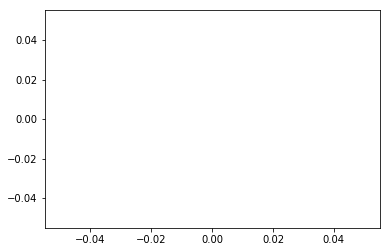

In [9]:
import matplotlib.pyplot as plt
plt.plot()
plt.show()

# 7. Adding Data

To generate the line chart we're interested in, we pass in the list of x-values as the first parameter and the list of y-values as the second parameter to plot():

`plt.plot(x_values, y_values)`

 **The axis ticks consist of tick marks and tick labels.**

In [10]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/axis+ticks.png')

## TODO:
* Generate a line chart that visualizes the unemployment rates from 1948:
  * x-values should be the first 12 values in the DATE column
  * y-values should be the first 12 values in the VALUE column
* Display the plot.

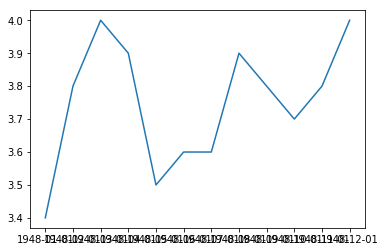

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
first_12=unrate[:12]

plt.plot(first_12['DATE'],first_12['VALUE'])
plt.show()

# 8. Fixing Axis Ticks

While the y-axis looks fine, the x-axis tick labels are too close together and are unreadable

The `xticks()` function within pyplot lets you customize the behavior of the x-axis ticks. If you head over to the [documentation for that function](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks), it's not immediately obvious the arguments it takes:

`matplotlib.pyplot.xticks(*args, **kwargs)`

## TODO:
* Generate the same line chart from the last screen that visualizes the unemployment rates from 1948:
  * x-values should be the first 12 values in the DATE column
  * y-values should be the first 12 values in the VALUE column
* Use pyplot.xticks() to rotate the x-axis tick labels by 90 degrees.
* Display the plot.

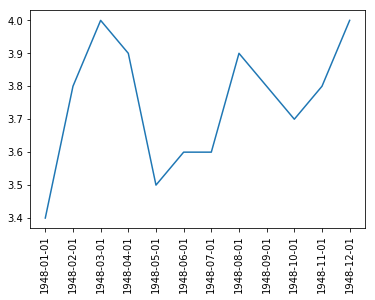

In [12]:
first_12=unrate[0:12]

plt.plot(first_12['DATE'],first_12['VALUE'])
plt.xticks(rotation=90)
plt.show()

# 9. Adding Axis Labels And A Title

Here's an overview of the pyplot functions we need to tweak the axis labels and the plot title:

* **`xlabel()`**: accepts a string value, which gets set as the x-axis label.
* **`ylabel()`**: accepts a string value, which is set as the y-axis label.
* **`title()`**: accepts a string value, which is set as the plot title.

## TODO:
* Generate the same line chart from the last screen that visualizes the unemployment rates from 1948:
  * x-values should be the first 12 values in the DATE column
  * y-values should be the first 12 values in the VALUE column
* Rotate the x-axis tick labels by 90 degrees.
* Set the x-axis label to "Month".
* Set the y-axis label to "Unemployment Rate".
* Set the plot title to "Monthly Unemployment Trends, 1948".
* Display the plot.

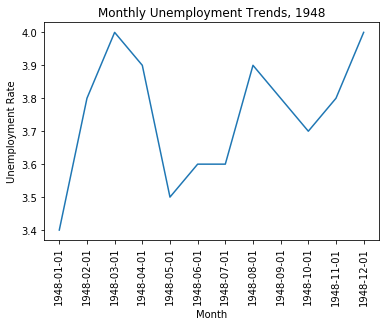

In [13]:
f_twelve=unrate[0:12]
plt.plot(f_twelve['DATE'],f_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show()